accuracy for 1 is:  0.9736842105263158
accuracy for 2 is:  0.9736842105263158
accuracy for 3 is:  0.9736842105263158
accuracy for 4 is:  0.9473684210526315
accuracy for 5 is:  0.9736842105263158
accuracy for 6 is:  0.9736842105263158
accuracy for 7 is:  1.0
accuracy for 8 is:  0.9736842105263158
accuracy for 9 is:  1.0
accuracy for 10 is:  1.0
accuracy for 11 is:  1.0
accuracy for 12 is:  1.0
accuracy for 13 is:  1.0
accuracy for 14 is:  0.9736842105263158
accuracy for 15 is:  0.9736842105263158
accuracy for 16 is:  0.9736842105263158
accuracy for 17 is:  0.9736842105263158
accuracy for 18 is:  0.9736842105263158
accuracy for 19 is:  0.9736842105263158
accuracy for 20 is:  0.9210526315789473


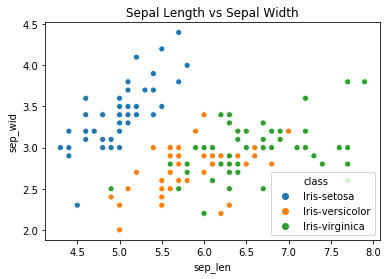

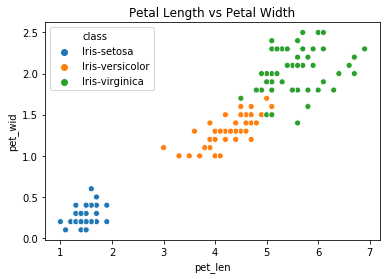

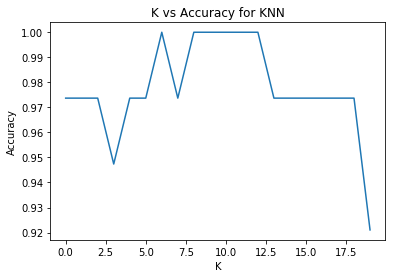

In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import pickle

iris_data = pd.read_csv('iris_data.txt', sep = ',', header = None)
iris_data.columns = ['sep_len', 'sep_wid', 'pet_len', 'pet_wid', 'class']

train_data, test_data = train_test_split(iris_data, test_size=0.25, random_state = 100)

train_data_X = train_data.drop(['class'],axis=1)
train_data_y = train_data['class']

test_data_X = test_data.drop(['class'],axis=1)
test_data_y = test_data['class']

plt.figure()
sns.scatterplot(iris_data['sep_len'], iris_data['sep_wid'], hue = iris_data['class']).set_title("Sepal Length vs Sepal Width")
plt.figure()
sns.scatterplot(iris_data['pet_len'], iris_data['pet_wid'], hue = iris_data['class']).set_title("Petal Length vs Petal Width")
accuracy_scores = [0]*20
for i in range(1, 21):
    knn_model = KNeighborsClassifier(i)
    knn_model.fit(train_data_X, train_data_y)

    prediction = knn_model.predict(test_data_X)
    acc_score = metrics.accuracy_score(prediction, test_data_y)
    print("accuracy for {} is: ".format(i), acc_score)
    accuracy_scores[i-1] = acc_score
plt.figure()
plt.plot(range(20), accuracy_scores)
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.title("K vs Accuracy for KNN")
plt.show()

#choose 10 as num of neighbors    
knn_model = KNeighborsClassifier(10)
knn_model.fit(train_data_X, train_data_y)

pickle.dump(knn_model, open('knn_model.pkl','wb'))


